In [1]:
%run result_preprocessing.ipynb

My current directory is : /home/spectre/Desktop/summer_project/Summer-project-ML
My directory name is : Summer-project-ML
each end year of training set is: [1985 1986 1987 1988]


spliting data:   0%|>>>>>>>>>>| 0/4 [00:00<?, ?it/s]

train start year is 1972
train end year is 1985
val start year is 1986
val end year is 1991
test start year is 1992
test end year is 2017


spliting data:  25%|>>>>>>>>>>| 1/4 [00:00<00:02,  1.30it/s]

train start year is 1973
train end year is 1986
val start year is 1987
val end year is 1992
test start year is 1993
test end year is 2018


spliting data:  50%|>>>>>>>>>>| 2/4 [00:01<00:01,  1.31it/s]

train start year is 1974
train end year is 1987
val start year is 1988
val end year is 1993
test start year is 1994
test end year is 2019


spliting data:  75%|>>>>>>>>>>| 3/4 [00:02<00:00,  1.31it/s]

train start year is 1975
train end year is 1988
val start year is 1989
val end year is 1994
test start year is 1995
test end year is 2020


spliting data: 100%|>>>>>>>>>>| 4/4 [00:03<00:00,  1.18it/s]


DatetimeIndex(['1992-01-31', '1992-01-31', '1992-01-31', '1992-01-31',
               '1992-01-31', '1992-01-31', '1992-01-31', '1992-01-31',
               '1992-01-31', '1992-01-31',
               ...
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31', '2017-12-31', '2017-12-31',
               '2017-12-31', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=238048, freq=None)
DatetimeIndex(['1993-01-31', '1993-01-31', '1993-01-31', '1993-01-31',
               '1993-01-31', '1993-01-31', '1993-01-31', '1993-01-31',
               '1993-01-31', '1993-01-31',
               ...
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31', '2018-12-31', '2018-12-31',
               '2018-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=235983, freq=None)
DatetimeIndex(['1994-01-31', '1994-01-31', '1994-01-31', '1994-01-

In [2]:
# delete all the unnecessary data
del(each_month_permno_num)
del(element)
del(features_list)
del(gbrt_pred_df_list)
del(gbrt_real_df_list)
del(gbrt_result_df)
del(interaction_table)
del(macro_df)
del(macro_features)
del(original_features_list)
del(permno_list)
del(permno_test_dict)
del(permno_total)
del(rf_result_df)
del(tmp_y_test)
del(remove_list)
del(raw_df)
del(new_features_list)
del(new_total_df)
del(list_to_remove)
del(captured)
del(rf_pred_df_list)
del(rf_real_df_list)
del(table_for_interaction)
del(total_df)
del(X_test_dict)
del(X_total)
del(X_train_dict)
del(X_val_dict)
del(y_test_dict)
del(y_total)
del(y_train_dict)
del(y_val_dict)
del(single_features)

In [3]:
trading_cost = 0.003

In [4]:
merged_pred_df

,date,permno,ret_1985,ret_1986,ret_1987,ret_1988,ret_ave
0,1992-01-31,18921,0.014640,NaN,NaN,NaN,0.014640
1,1992-01-31,24942,0.011967,NaN,NaN,NaN,0.011967
2,1992-01-31,46228,0.020178,NaN,NaN,NaN,0.020178
3,1992-01-31,14154,0.022688,NaN,NaN,NaN,0.022688
4,1992-01-31,91380,0.014422,NaN,NaN,NaN,0.014422
...,...,...,...,...,...,...,...
260338,2020-12-31,60986,NaN,NaN,NaN,0.023059,0.023059
260339,2020-12-31,21207,NaN,NaN,NaN,0.021008,0.021008
260340,2020-12-31,57665,NaN,NaN,NaN,0.018508,0.018508
260341,2020-12-31,57817,NaN,NaN,NaN,0.022357,0.022357


In [5]:
pred_ave_ret_df = merged_pred_df[['date', 'permno', 'ret_ave']]
pred_ave_ret_df.set_index('date', inplace=True)
pred_ave_ret_df

,permno,ret_ave
date,,
1992-01-31,18921,0.014640
1992-01-31,24942,0.011967
1992-01-31,46228,0.020178
1992-01-31,14154,0.022688
1992-01-31,91380,0.014422
...,...,...
2020-12-31,60986,0.023059
2020-12-31,21207,0.021008
2020-12-31,57665,0.018508


In [62]:
# quick chec
pred_ave_ret_df.ret_ave.nunique()

260343

*download the data of s&p500*

In [26]:
#download s&p500 data from yahoo finance
import yfinance

sp500_data = yfinance.download(tickers = "^GSPC", start = "1991-12-31", end = "2021-01-01", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [27]:
sp500_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1991-12-31,415.140015,418.320007,412.730011,417.089996,417.089996,247080000
1992-01-02,417.029999,417.269989,411.040009,417.260010,417.260010,207570000
1992-01-03,417.269989,419.790009,416.160004,419.339996,419.339996,224270000
1992-01-06,419.309998,419.440002,416.920013,417.959991,417.959991,251210000
1992-01-07,417.959991,417.959991,415.200012,417.399994,417.399994,252780000
...,...,...,...,...,...,...
2020-12-24,3694.030029,3703.820068,3689.320068,3703.060059,3703.060059,1885090000
2020-12-28,3723.030029,3740.510010,3723.030029,3735.360107,3735.360107,3527460000
2020-12-29,3750.010010,3756.120117,3723.310059,3727.040039,3727.040039,3387030000


In [50]:
# monthly return for s&p500
sp500_m_adj_close = sp500_data['Adj Close'].resample('M').ffill()
sp500_m_ret = sp500_m_adj_close.pct_change()[1:]

In [51]:
sp500_m_ret

Date
1992-01-31   -0.019924
1992-02-29    0.009590
1992-03-31   -0.021832
1992-04-30    0.027893
1992-05-31    0.000964
                ...   
2020-08-31    0.070065
2020-09-30   -0.039228
2020-10-31   -0.027666
2020-11-30    0.107546
2020-12-31    0.037121
Freq: M, Name: Adj Close, Length: 348, dtype: float64

*for the long part: we put equal weigh on the top 50 permnos that have the biggest average return*

*for the short part: we put equal weigh on the bottom 50 permnos that have the smallest average return*

In [9]:
long_ports = pred_ave_ret_df.groupby('date').apply(lambda x: x.sort_values('ret_ave', ascending=False)).groupby('date').head(50)
short_ports = pred_ave_ret_df.groupby('date').apply(lambda x: x.sort_values('ret_ave', ascending=True)).groupby('date').head(50)

In [11]:
long_ports

,permno,ret_ave
date,,
1992-01-31,18278,0.035369
1992-01-31,13290,0.032464
1992-01-31,48565,0.029432
1992-01-31,54447,0.029139
1992-01-31,41515,0.028582
...,...,...
2020-12-31,71175,0.026044
2020-12-31,75573,0.025982
2020-12-31,84032,0.025947


calculate the monthly return

In [52]:
long_ports_ret = long_ports.groupby('date')['ret_ave'].apply('mean')

In [53]:
long_ports_ret

date
1992-01-31    0.023750
1992-02-29    0.023852
1992-03-31    0.022463
1992-04-30    0.022629
1992-05-31    0.022068
                ...   
2020-08-31    0.033137
2020-09-30    0.031550
2020-10-31    0.029618
2020-11-30    0.031509
2020-12-31    0.030380
Name: ret_ave, Length: 348, dtype: float64

In [63]:
short_ports_ret = short_ports.groupby('date')['ret_ave'].apply('mean')*(-1)

In [64]:
short_ports_ret

date
1992-01-31   -0.010991
1992-02-29   -0.010973
1992-03-31   -0.010638
1992-04-30   -0.010616
1992-05-31   -0.010877
                ...   
2020-08-31   -0.014423
2020-09-30    0.001719
2020-10-31   -0.002464
2020-11-30   -0.007553
2020-12-31   -0.013005
Name: ret_ave, Length: 348, dtype: float64

In [76]:
long_short_ports_ret = (long_ports_ret + short_ports_ret)/2

quick check

In [65]:
long_ports_ret.isnull().sum()

0

In [66]:
short_ports_ret.isnull().sum()

0

In [67]:
sp500_m_ret.isnull().sum()

0

In [77]:
long_ports_cumu_ret = (long_ports_ret+1).cumprod() - 1
short_ports_cumu_ret = (short_ports_ret+1).cumprod() - 1
long_short_cumu_ret = (long_short_ports_ret+1).cumprod() - 1
sp500_m_cumu_ret = (sp500_m_ret+1).cumprod() - 1


In [79]:
long_ports_cumu_ret

date
1992-01-31       0.023750
1992-02-29       0.048169
1992-03-31       0.071714
1992-04-30       0.095966
1992-05-31       0.120152
                 ...     
2020-08-31    5446.403423
2020-09-30    5618.269168
2020-10-31    5784.700283
2020-11-30    5966.999887
2020-12-31    6148.305572
Name: ret_ave, Length: 348, dtype: float64

In [78]:
long_short_cumu_ret

date
1992-01-31     0.006380
1992-02-29     0.012860
1992-03-31     0.018849
1992-04-30     0.024969
1992-05-31     0.030704
                ...    
2020-08-31    27.228520
2020-09-30    27.698088
2020-10-31    28.087717
2020-11-30    28.436122
2020-12-31    28.691843
Name: ret_ave, Length: 348, dtype: float64

In [73]:
sp500_m_cumu_ret

Date
1992-01-31   -0.019924
1992-02-29   -0.010525
1992-03-31   -0.032127
1992-04-30   -0.005131
1992-05-31   -0.004172
                ...   
2020-08-31    7.392218
2020-09-30    7.063008
2020-10-31    6.839939
2020-11-30    7.683090
2020-12-31    8.005419
Freq: M, Name: Adj Close, Length: 348, dtype: float64

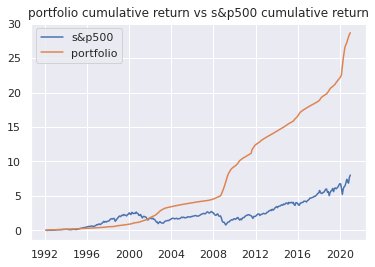

In [80]:
plt.title('portfolio cumulative return vs s&p500 cumulative return')
plt.plot(sp500_m_cumu_ret, label='s&p500')
plt.plot(long_short_cumu_ret, label='portfolio')
plt.legend()
plt.show()
